In [ ]:
# #colab에서 한글이 깨질때 나눔폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (50.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and di

In [ ]:
from google.colab import drive
drive.mount('./MyDrive')

Drive already mounted at ./MyDrive; to attempt to forcibly remount, call drive.mount("./MyDrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
jobis_df = pd.read_csv('/content/MyDrive/MyDrive/Jobis_3o3.csv', encoding="utf-8")

In [ ]:
# 한글 폰트 적용
plt.rc('font', family='NanumBarunGothic')
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') 
# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)

# 컬럼 정보

*   age: 고객의 만 나이
*  gender: 고객의 성별
*   year: 소득이 발생한 연도(귀속년도)
*   refund: 예상환급액입니다.
*   fee: 수수료입니다.
*   has_paid: 수수료를 결제했는지의 여부
*   income_근로: 고객의 근로소득(월급/일용직급여)
*   income_사업: 고객의 사업소득(프리랜서 소득)
*   income_기타: 고객의 기타소득(그외 기타 소득)






In [ ]:
jobis_df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN


In [ ]:
jobis_df['year'].sort_values()

27765    2015
96594    2015
55560    2015
96597    2015
55568    2015
         ... 
78033    2020
78032    2020
78031    2020
37586    2020
31589    2020
Name: year, Length: 100000, dtype: int64

In [ ]:
print(jobis_df.shape) # 데이터의 행, 열 개수 출력
print(jobis_df.dtypes) # 데이터의 타입 출력

(100000, 9)
age          float64
gender        object
year           int64
refund       float64
fee          float64
has_paid        bool
income_근로    float64
income_사업    float64
income_기타    float64
dtype: object


In [ ]:
jobis_df.isna().sum() # NaN값이 income 항목에서 많이 나옴


age              0
gender           0
year             0
refund           0
fee              0
has_paid         0
income_근로    59209
income_사업    21773
income_기타    74740
dtype: int64

In [ ]:
jobis_df.describe() # 컬럼별 요약 통계 지표 출력

,age,year,refund,fee,income_근로,income_사업,income_기타
count,100000.00000,100000.000000,1.000000e+05,100000.000000,4.079100e+04,7.822700e+04,2.526000e+04
mean,29.00096,2018.111300,2.081422e+05,7247.641000,6.432597e+06,1.511712e+06,6.362834e+05
std,7.76819,1.495812,3.071744e+05,11926.896979,6.583716e+06,2.449810e+06,1.484947e+06
min,15.00000,2015.000000,-8.265000e+06,400.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,24.00000,2017.000000,3.300000e+04,400.000000,1.616000e+06,1.770000e+05,8.200000e+04
50%,27.00000,2018.000000,9.900000e+04,4300.000000,4.507000e+06,6.190000e+05,2.130000e+05
75%,31.00000,2019.000000,2.540000e+05,8500.000000,9.301000e+06,1.601000e+06,5.820000e+05
max,81.00000,2020.000000,7.725000e+06,307000.000000,1.823350e+08,3.993400e+07,6.281000e+07


In [ ]:
jobis_df.corr() # 상관관계 1에 가까울수록 연관성이 아주 크다는 의미

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타
age,1.000000,-0.113500,0.078485,0.072135,-0.022918,0.341343,0.097144,0.105064
year,-0.113500,1.000000,0.140977,0.169537,-0.136060,0.075071,0.149177,0.035263
refund,0.078485,0.140977,1.000000,0.969427,-0.094061,-0.110196,0.785344,0.737711
fee,0.072135,0.169537,0.969427,1.000000,-0.117695,-0.112256,0.777466,0.742307
has_paid,-0.022918,-0.136060,-0.094061,-0.117695,1.000000,-0.014584,-0.103945,-0.108696
income_근로,0.341343,0.075071,-0.110196,-0.112256,-0.014584,1.000000,-0.091732,0.044542
income_사업,0.097144,0.149177,0.785344,0.777466,-0.103945,-0.091732,1.000000,0.067535
income_기타,0.105064,0.035263,0.737711,0.742307,-0.108696,0.044542,0.067535,1.000000


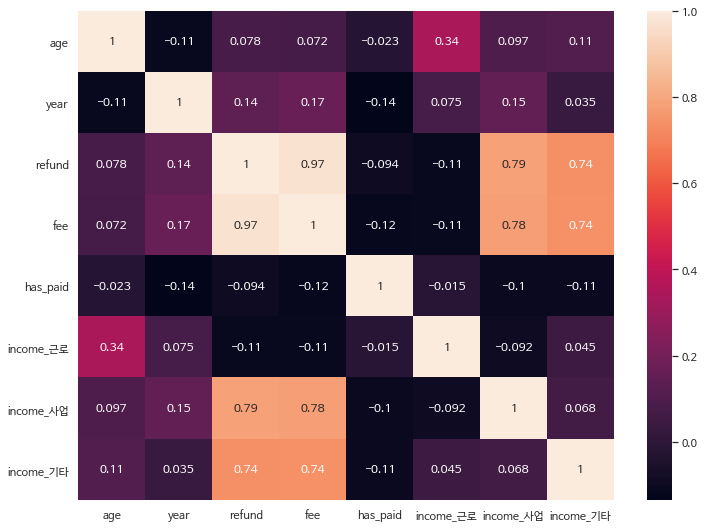

In [ ]:
sns.heatmap(jobis_df.corr(), annot=True)


# 상관관계

refund / fee 0.97

refund / income_사업 0.79

fee / income_사업 0.78

refund / income_기타 0.74

fee / income_기타 0.74

age / income_근로 0.34

year / fee 0.17 

year / income_사업 0.15

year / refund 0.14

age / income_기타 0.11

age / income_사업 0.097

age / refund 0.078

year / income_근로 0.075

age / fee 0.072

income_사업 / income_기타 0.068

income_근로 / income_기타 0.045

year / income_기타 0.035

---
# 상관관계가 높은 항목

refund / fee 0.97

refund / income_사업 0.79

fee / income_사업 0.78

refund / income_기타 0.74

ee / income_기타 0.74

age / income_근로 0.34

year / fee 0.17 

year / income_사업 0.15

year / refund 0.14

age / income_기타 0.11

# 개인적인 전처리 방향


1.   고객의 결제여부에 영향을 미치는 요인으로 가장 유력한것 3항목 추출
     
     refund / fee, refund / income_사업, fee / income_사업

2.   수수료 결제 금액의 합을 높이기 위해서 항목 조합할 것

     상관관계 0.1이상 항목에서 조합할 것


3.   수수료를 지불한 사람과 지불하지 않은 사람의 차이점 분석






In [ ]:
jobis_df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN


In [ ]:
# NaN값 0으로 채우기 --> 연속성이나 기준점이 없기 때문에 0으로 채움
jobis_df['income_근로'] = jobis_df['income_근로'].fillna(0)
jobis_df['income_사업'] = jobis_df['income_사업'].fillna(0)
jobis_df['income_기타'] = jobis_df['income_기타'].fillna(0)

In [ ]:
jobis_df['refund_rate'] = round(jobis_df['fee']/jobis_df['refund'], 4)*100 # refund * refund_rate = fee 이므로 역으로 계산해서 구함
jobis_df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,refund_rate
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,0.0,8.00
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,0.0,1815000.0,1.70
2,28.0,F,2017,289000.0,11500.0,False,0.0,1461000.0,0.0,3.98
3,27.0,M,2019,410000.0,16200.0,False,0.0,2471000.0,0.0,3.95
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,0.0,3.77
...,...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,0.0,0.0,680000.0,3.95
99996,62.0,F,2019,77000.0,1300.0,True,0.0,463000.0,0.0,1.69
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,0.0,4.44
99998,24.0,M,2019,34000.0,400.0,True,0.0,204000.0,0.0,1.18


In [ ]:
job_has_paid = jobis_df[jobis_df['has_paid']==True] # 수수료를 지불한 사람들 기준
job_has_paid

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,refund_rate
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,0.0,1815000.0,1.70
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,0.0,3.77
5,39.0,F,2015,546000.0,12800.0,True,0.0,3628000.0,213000.0,2.34
6,40.0,F,2019,4000.0,400.0,True,11512000.0,24000.0,0.0,10.00
7,23.0,M,2017,10000.0,400.0,True,186000.0,74000.0,0.0,4.00
...,...,...,...,...,...,...,...,...,...,...
99994,32.0,M,2016,101000.0,3000.0,True,0.0,0.0,0.0,2.97
99995,27.0,F,2019,301000.0,11900.0,True,0.0,0.0,680000.0,3.95
99996,62.0,F,2019,77000.0,1300.0,True,0.0,463000.0,0.0,1.69
99998,24.0,M,2019,34000.0,400.0,True,0.0,204000.0,0.0,1.18


In [ ]:
job_has_paid.isnull().sum()

age            0
gender         0
year           0
refund         0
fee            0
has_paid       0
income_근로      0
income_사업      0
income_기타      0
refund_rate    0
dtype: int64

In [ ]:
job_has_paid.median() # 수수료를 지불한 사람들의 중앙값

age                27.00
year             2018.00
refund          94000.00
fee              3000.00
has_paid            1.00
income_근로           0.00
income_사업      422000.00
income_기타           0.00
refund_rate         2.86
dtype: float64

In [ ]:
job_has_false = jobis_df[jobis_df['has_paid']==False] # 수수료를 지불하지 않은 사람들
job_has_false

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,refund_rate
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,0.0,8.00
2,28.0,F,2017,289000.0,11500.0,False,0.0,1461000.0,0.0,3.98
3,27.0,M,2019,410000.0,16200.0,False,0.0,2471000.0,0.0,3.95
8,54.0,M,2016,1847000.0,73100.0,False,18728000.0,0.0,2841000.0,3.96
9,22.0,M,2018,51000.0,900.0,False,0.0,0.0,153000.0,1.76
...,...,...,...,...,...,...,...,...,...,...
99984,25.0,F,2018,286000.0,8500.0,False,0.0,0.0,0.0,2.97
99988,45.0,M,2018,152000.0,4300.0,False,0.0,0.0,0.0,2.83
99992,25.0,F,2018,137000.0,3800.0,False,0.0,0.0,0.0,2.77
99993,32.0,F,2018,5000.0,400.0,False,7336000.0,28000.0,0.0,8.00


In [ ]:
job_has_false.isnull().sum()

age            0
gender         0
year           0
refund         0
fee            0
has_paid       0
income_근로      0
income_사업      0
income_기타      0
refund_rate    0
dtype: int64

In [ ]:
job_has_false.median() # 수수료를 지불하지 않은 사람들 중앙값

age                27.00
year             2019.00
refund         110000.00
fee              4300.00
has_paid            0.00
income_근로           0.00
income_사업      115000.00
income_기타           0.00
refund_rate         3.84
dtype: float64

In [ ]:
jobis = jobis_df
jobis['has_paid'] = jobis['has_paid'].replace({True:1, False:0})
jobis['gender'] = jobis['gender'].replace({'M':1, 'F':0})
jobis

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,refund_rate
0,27.0,0,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00
1,34.0,1,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70
2,28.0,0,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98
3,27.0,1,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95
4,26.0,0,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77
...,...,...,...,...,...,...,...,...,...,...
99995,27.0,0,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95
99996,62.0,0,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69
99997,24.0,1,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44
99998,24.0,1,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18


# True / False의 중앙값 비교



*   age의 중앙값은 27으로 동일
*   refund는 false가 7000정도 더 높음
*   fee는 false가 1300정도 더 높음
*   income_근로 false가 132000 더 높음 
*   income_사업 false가 133000 더 높음
*   income_기타 false가 59500 더 높음
*   refund_rate false가 0.98 더 높음







---
# 비교결과
False에 속한 사람들이 모든 항목이 더 높게 나옴

*   income_사업 자영업 또는 프리랜서로서 False가 더 높음
*   income_기타 기타소득 False가 더 높음
*   소득신고를 본인이 해야하는 사람들에게서 False가 더 많이 나오는 것 같음
*   refund_rate가 3.84보다 높을 때 False가 되는지 확인 해야할 듯
*   True / False 이기 때문에 분류(classification)으로 분석할 것














In [ ]:
job_a = jobis[jobis['income_근로'] != 0] # 근로가 0이 아닐 때
job_a

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,refund_rate
0,27.0,0,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00
1,34.0,1,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70
6,40.0,0,2019,4000.0,400.0,1,11512000.0,24000.0,0.0,10.00
7,23.0,1,2017,10000.0,400.0,1,186000.0,74000.0,0.0,4.00
8,54.0,1,2016,1847000.0,73100.0,0,18728000.0,0.0,2841000.0,3.96
...,...,...,...,...,...,...,...,...,...,...
99987,29.0,0,2018,37000.0,400.0,1,10657000.0,224000.0,0.0,1.08
99991,30.0,1,2018,12000.0,400.0,1,692000.0,70000.0,0.0,3.33
99993,32.0,0,2018,5000.0,400.0,0,7336000.0,28000.0,0.0,8.00
99997,24.0,1,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44


In [ ]:
job_b = jobis[jobis['income_사업']!=0] # 사업이 0이 아닐 때
job_b

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,refund_rate
0,27.0,0,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00
2,28.0,0,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98
3,27.0,1,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95
4,26.0,0,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77
5,39.0,0,2015,546000.0,12800.0,1,0.0,3628000.0,213000.0,2.34
...,...,...,...,...,...,...,...,...,...,...
99993,32.0,0,2018,5000.0,400.0,0,7336000.0,28000.0,0.0,8.00
99996,62.0,0,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69
99997,24.0,1,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44
99998,24.0,1,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18


In [ ]:
job_c = jobis[jobis['income_기타']!=0] # 기타가 0이 아닐 때
job_c

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,refund_rate
1,34.0,1,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70
5,39.0,0,2015,546000.0,12800.0,1,0.0,3628000.0,213000.0,2.34
8,54.0,1,2016,1847000.0,73100.0,0,18728000.0,0.0,2841000.0,3.96
9,22.0,1,2018,51000.0,900.0,0,0.0,0.0,153000.0,1.76
11,25.0,0,2020,753000.0,29800.0,0,0.0,0.0,1828000.0,3.96
...,...,...,...,...,...,...,...,...,...,...
99978,27.0,1,2018,276000.0,19100.0,1,0.0,1663000.0,775000.0,6.92
99980,42.0,1,2018,120000.0,4700.0,1,14949000.0,0.0,1065000.0,3.92
99982,28.0,0,2020,94000.0,1700.0,1,10636000.0,0.0,85000.0,1.81
99986,40.0,0,2016,47000.0,400.0,1,0.0,281000.0,43000.0,0.85


In [ ]:
job_aa = job_a.groupby('has_paid')['income_근로'].count() # has_paid를 기준으로 잡고 income_근로 카운트
job_aa

has_paid
0    11987
1    27905
Name: income_근로, dtype: int64

In [ ]:
job_ba = job_b.groupby('has_paid')['income_사업'].count() # has_paid를 기준으로 income_사업 카운트
job_ba

has_paid
0    22721
1    55449
Name: income_사업, dtype: int64

In [ ]:
job_ca = job_c.groupby('has_paid')['income_기타'].count() # has_paid를 기준으로 income_기타 카운트
job_ca

has_paid
0     8529
1    16583
Name: income_기타, dtype: int64

# income 항목을 분류
refund / fee 다음으로 상관관계가 높은 income을 분류함

has_paid가 되는 기준을 찾아야함